In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
! pip install memory_profiler
%load_ext memory_profiler
#! pip install ipython -U
#! pip install ipython_genutils -U

# Dataset Preperation

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.6 MB/s 


In [4]:
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import regex as re

In [5]:
sar_acc = pd.read_json('/content/drive/Shareddrives/ECE 359 - Lex Labs/Sarcasm_Headlines_Dataset_v2.json',lines=True)
sar_acc['source'] = sar_acc['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
sar_acc.head()

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


In [6]:
from wordcloud import STOPWORDS
import string
## Number of words in the text ##
sar_acc["num_words"] = sar_acc["headline"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
sar_acc["num_unique_words"] = sar_acc["headline"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
sar_acc["num_chars"] = sar_acc["headline"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
sar_acc["num_stopwords"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
sar_acc["num_punctuations"] =sar_acc['headline'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
sar_acc["num_words_upper"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
sar_acc["num_words_title"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
sar_acc["mean_word_len"] = sar_acc["headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A v

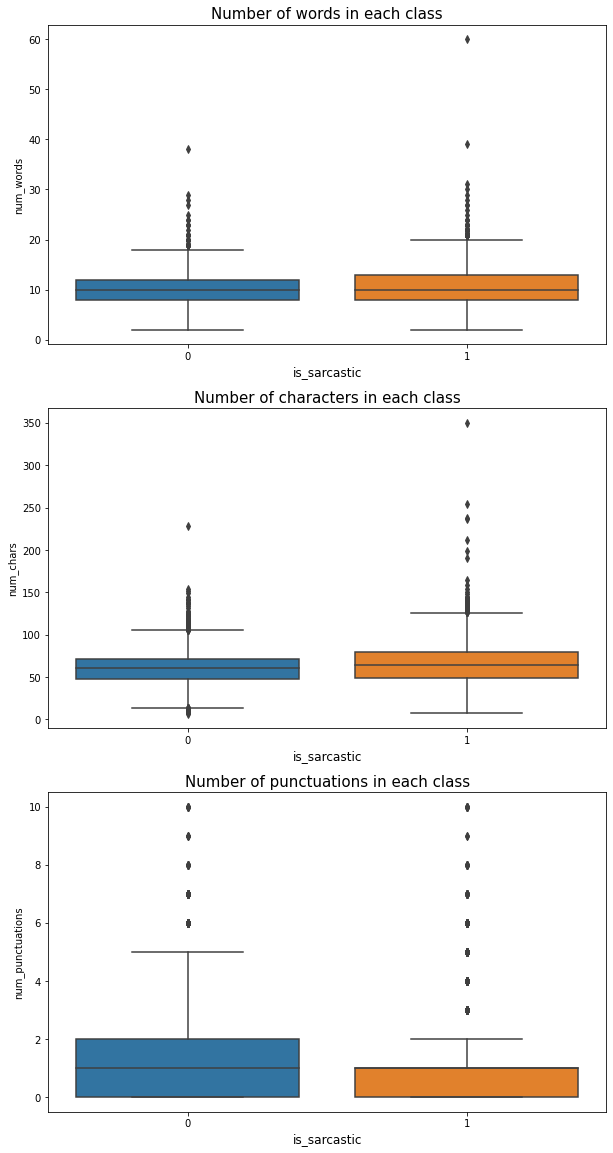

In [7]:
## Truncate some extreme values for better visuals ##
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

sar_acc['num_words'].loc[sar_acc['num_words']>60] = 60 #truncation for better visuals
sar_acc['num_punctuations'].loc[sar_acc['num_punctuations']>10] = 10 #truncation for better visuals
sar_acc['num_chars'].loc[sar_acc['num_chars']>350] = 350 #truncation for better visuals

sar_acc['num_words'].loc[sar_acc['num_words']>60] = 60 #truncation for better visuals
sar_acc['num_punctuations'].loc[sar_acc['num_punctuations']>10] = 10 #truncation for better visuals
sar_acc['num_chars'].loc[sar_acc['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='is_sarcastic', y='num_words', data=sar_acc, ax=axes[0])
axes[0].set_xlabel('is_sarcastic', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_chars', data=sar_acc, ax=axes[1])
axes[1].set_xlabel('is_sarcastic', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_punctuations', data=sar_acc, ax=axes[2])
axes[2].set_xlabel('is_sarcastic', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

#Training Data Preperation

In [8]:
#Getting X and Y ready
from sklearn.preprocessing import LabelEncoder
X = sar_acc.headline
Y = sar_acc.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [9]:
# 2. Split into Training and Test data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
# 3. Processing the data for the model

# Tokenize the data and convert the text to sequences.
# Add padding to ensure that all the sequences have the same shape.
# There are many ways of taking the max_len and here an arbitrary length of 150 is chosen


from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [11]:
# creating test sequence from text
test_sequences = tok.texts_to_sequences(X_test)
# creating test sequence matrix using above created test sequence
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [12]:
# initializing accuracy matrix to store accuracies of all the models and compare them
accuracy = {}

# CNN

In [13]:
import tensorflow as tf

In [14]:
import numpy as np

training_padded = np.array(sequences_matrix)      # training_padded = np.array(training_padded) in sarcasm-detection-with-cnn-rnn-lstm-bert.ipynb
training_labels = np.array(Y_train)               # training_labels = np.array(y_train)
testing_padded = np.array(test_sequences_matrix)  # testing_padded = np.array(testing_padded)
testing_labels = np.array(Y_test)                 # testing_labels = np.array(y_test)

In [15]:
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [16]:
#CNN Model
CNN_Model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 50, input_length = max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

CNN = CNN_Model
CNN.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
#%time %memit history1 = CNN.fit(training_padded, training_labels, batch_size=100, epochs=5, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

# Performance Metrics

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# evaluation of CNN model
accr = CNN.evaluate(test_sequences_matrix,Y_test)
# printing the loss and accuracy of our model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
# storing the model name and accuracy in accuracy dictionary
accuracy.update({"CNN":accr[1]})

179/179 [==============================] - 2s 9ms/step - loss: 0.6925 - accuracy: 0.5418
Test set
  Loss: 0.692
  Accuracy: 0.542


In [18]:
%time %memit Y_pred = np.round(CNN.predict(test_sequences_matrix))

peak memory: 566.74 MiB, increment: 6.04 MiB
CPU times: user 2.56 s, sys: 150 ms, total: 2.71 s
Wall time: 3.05 s


In [19]:
confusion_matrix(Y_test,Y_pred)

array([[3101,    0],
       [2623,    0]])

In [20]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      3101
           1       0.00      0.00      0.00      2623

    accuracy                           0.54      5724
   macro avg       0.27      0.50      0.35      5724
weighted avg       0.29      0.54      0.38      5724



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [21]:
#import pickle
#filename = 'CNN Model.sav'
#pickle.dump(tf.keras.Sequential, open(filename, 'wb'))


In [ ]:
from keras.models import load_model
CNN.save('CNN_model.h5')

# Mini-Batch Variation

In [ ]:
def get_performance_metrics(model,Minibatch_Array,Iterations):

    #Default Hyristics 
    #Minibatch_Array = [200,100,75,50,25]
    #Iterations = 5

    # Initiate Training Data Storage
    Training_Accuracy_Matrix = np.zeros((Iterations,1))
    Training_Runtime_Matrix = []
    Training_Memory_Usage_Matrix = np.zeros((Iterations,1))

  # Initiate Testing Data Storage
    Predicting_Accuracy_Matrix = np.zeros((Iterations,1))
    Predicting_Runtime_Matrix = []
    Predicting_Memory_Usage_Matrix = np.zeros((Iterations,1))

    for i, each_minibatch in enumerate(Minibatch_Array):

        #RNN Training Runtime
        Runtime_Train = %timeit -o CNN.fit(training_padded, training_labels, batch_size=Minibatch_Array[i], epochs=5, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
        Training_Runtime_Matrix = np.hstack((Training_Runtime_Matrix,np.mean(Runtime_Train.all_runs)))

        #RNN Prediction Runtime
        Runtime_Pred = %timeit -o np.round(CNN.predict(test_sequences_matrix))
        Predicting_Runtime_Matrix = np.hstack((Predicting_Runtime_Matrix,np.mean(Runtime_Pred.all_runs)))

        Training_Memory_Usage_Array = []
        Training_Accuracy_Array = []
        Predicting_Memory_Usage_Array = []
        Predicting_Accuracy_Array = []
    
        for j in range(0,Iterations):

            #RNN Training Memory Usage
            Memory_Usage_Train = %memit -o CNN.fit(sequences_matrix,Y_train,batch_size=Minibatch_Array[i],epochs=5, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
            Training_Memory_Usage_Array = np.hstack((Training_Memory_Usage_Array,Memory_Usage_Train.mem_usage[0]))

            #RNN Training Accuracy
            Training_Accuracy = CNN.evaluate(sequences_matrix,Y_train)
            Training_Accuracy_Array = np.hstack((Training_Accuracy_Array,Training_Accuracy[1]))

            #RNN Prediction Memory Usage
            Memory_Usage_Pred = %memit -o np.round(CNN.predict(test_sequences_matrix))
            Predicting_Memory_Usage_Array = np.hstack((Predicting_Memory_Usage_Array,Memory_Usage_Pred.mem_usage[0]))

            #RNN Prediction Accuracy
            Predicting_Accuracy = CNN.evaluate(test_sequences_matrix,Y_test)
            Predicting_Accuracy_Array = np.hstack((Predicting_Accuracy_Array,accr[1]))
    
        Training_Accuracy_Matrix = np.hstack((Training_Accuracy_Matrix,Training_Accuracy_Array.reshape(5,1)))
        Predicting_Accuracy_Matrix = np.hstack((Predicting_Accuracy_Matrix,Predicting_Accuracy_Array.reshape(5,1)))
        Training_Memory_Usage_Matrix = np.hstack((Training_Memory_Usage_Matrix,Training_Memory_Usage_Array.reshape(5,1)))
        Predicting_Memory_Usage_Matrix = np.hstack((Predicting_Memory_Usage_Matrix,Predicting_Memory_Usage_Array.reshape(5,1)))

    Average_Training_Runtime_Array = Training_Runtime_Matrix
    Average_Prediction_Runtime_Array = Predicting_Runtime_Matrix
    Average_Training_Accuracy_Array = np.mean(np.delete(Training_Accuracy_Matrix,0,axis=1),0)
    Average_Predicting_Accuracy_Array = np.mean(np.delete(Predicting_Accuracy_Matrix,0,axis=1),0)
    Average_Training_Memory_Usage_Array = np.mean(np.delete(Training_Memory_Usage_Matrix,0,axis=1),0)
    Average_Predicting_Memory_Usage_Array = np.mean(np.delete(Predicting_Memory_Usage_Matrix,0,axis=1),0)

    return Average_Training_Runtime_Array,Average_Prediction_Runtime_Array,Average_Training_Accuracy_Array,Average_Predicting_Accuracy_Array,Average_Training_Memory_Usage_Array,Average_Predicting_Memory_Usage_Array

In [22]:
Minibatch_Array = [200,100,75,50,25]
Iterations = 5
get_performance_metrics(CNN,Minibatch_Array,Iterations)

NameError: ignored

In [ ]:
print(Average_Training_Accuracy_Array)
print(Average_Predicting_Accuracy_Array)
print(Average_Training_Runtime_Array)
print(Average_Prediction_Runtime_Array)
print(Average_Training_Memory_Usage_Array)
print(Average_Predicting_Memory_Usage_Array)

In [23]:
def get_prediction_accuracy(model,Minibatch_Array,Iterations):
  # Initiate Testing Data Storage
  Predicting_Accuracy_Matrix = np.zeros((Iterations,1))
  for i, each_minibatch in enumerate(Minibatch_Array):
    #Fit Model Using Minibatch
    print(each_minibatch)
    Predicting_Accuracy_Array = []
    for j in range(0,Iterations):
      #RNN Prediction Accuracy
      model = CNN_Model
      model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
      model.fit(sequences_matrix,Y_train,batch_size=each_minibatch,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
      Predicting_Accuracy = model.evaluate(test_sequences_matrix,Y_test)
      Predicting_Accuracy_Array = np.hstack((Predicting_Accuracy_Array,Predicting_Accuracy[1]))
    #Predicting Accuracy Matrix
    Predicting_Accuracy_Matrix = np.hstack((Predicting_Accuracy_Matrix,Predicting_Accuracy_Array.reshape(5,1)))
  # Average Predicting Accuracy 
  Average_Predicting_Accuracy_Array = np.mean(np.delete(Predicting_Accuracy_Matrix,0,axis=1),0)
  return Average_Predicting_Accuracy_Array  

def get_training_accuracy(model,Minibatch_Array,Iterations):
  # Initiate Training Data Storage
  Training_Accuracy_Matrix = np.zeros((Iterations,1))
  for i, each_minibatch in enumerate(Minibatch_Array):
    #Fit Model Using Minibatch
    print(each_minibatch)
    Training_Accuracy_Array = []
    for j in range(0,Iterations):
      #RNN Training Accuracy
      model = CNN_Model
      model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
      model.fit(sequences_matrix,Y_train,batch_size=each_minibatch,epochs=5, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
      Training_Accuracy = model.evaluate(sequences_matrix,Y_train)
      Training_Accuracy_Array = np.hstack((Training_Accuracy_Array,Training_Accuracy[1]))
    #Training Accuracy Matrix
    Training_Accuracy_Matrix = np.hstack((Training_Accuracy_Matrix,Training_Accuracy_Array.reshape(5,1)))
  #Average Training Accuracies
  Average_Training_Accuracy_Array = np.mean(np.delete(Training_Accuracy_Matrix,0,axis=1),0)
  return Average_Training_Accuracy_Array     

In [24]:
Minibatch_Array = [200,100,75,50,25]
Iterations = 5

In [25]:
Average_Training_Accuracy_Array = get_training_accuracy(CNN,Minibatch_Array,Iterations)
Average_Predicting_Accuracy_Array  = get_prediction_accuracy(CNN,Minibatch_Array,Iterations)

200
Epoch 1/5
716/716 [==============================] - 7s 10ms/step - loss: 0.6613 - accuracy: 0.6289
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.5572 - accuracy: 0.7026
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.4295 - accuracy: 0.7944
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.4483 - accuracy: 0.7735
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.3805 - accuracy: 0.8251
100
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.4754 - accuracy: 0.7728
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.3683 - accuracy: 0.8344
Epoch 1/5
716/716 [==============================] - 6s 9ms/step - loss: 0.4481 - accuracy: 0.7884
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.3595 - accuracy: 0.8355
Epoch 1/5
716/716 [==============================] - 7s 9ms/step - loss: 0.3545 - accuracy: 0.8401
7

In [26]:
print(Average_Training_Accuracy_Array)
print(Average_Predicting_Accuracy_Array)

[0.74488752 0.81424766 0.84570431 0.85474558 0.86199608]
[0.8265898  0.82208246 0.82089449 0.80580015 0.8089448 ]
